In [34]:
import pandas as pd
df=pd.read_csv("wine.data",header=None,names=["target","Alcohol","Malic_acid","Ash","Alcalinity_of_ash","Magnesium","Total_phenols","Flavanoids","Nonflavanoid_phenols","Proanthocyanins","Color_intensity","Hue","diluted","Proline"])

In [35]:
df.isnull().sum()

target                  0
Alcohol                 0
Malic_acid              0
Ash                     0
Alcalinity_of_ash       0
Magnesium               0
Total_phenols           0
Flavanoids              0
Nonflavanoid_phenols    0
Proanthocyanins         0
Color_intensity         0
Hue                     0
diluted                 0
Proline                 0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   target                178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  diluted               178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [37]:
x=df.drop("target",axis=1)
y=df["target"]

In [38]:
num=list(x.columns)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33, random_state=42)

In [41]:
pipe=Pipeline(steps=[("simpleimputer",SimpleImputer(strategy="constant",fill_value=0)),("robustscaler",RobustScaler()),("standardscaler",StandardScaler())])

In [42]:
prep=ColumnTransformer([("pipeline",pipe,num)])

In [44]:
x_train=prep.fit_transform(x_train)
x_test=prep.transform(x_test)

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca=PCA(n_components=2)

In [50]:
xt=pca.fit_transform(x_train)

In [48]:
pca.explained_variance_ratio_

array([0.36351132, 0.18633855])

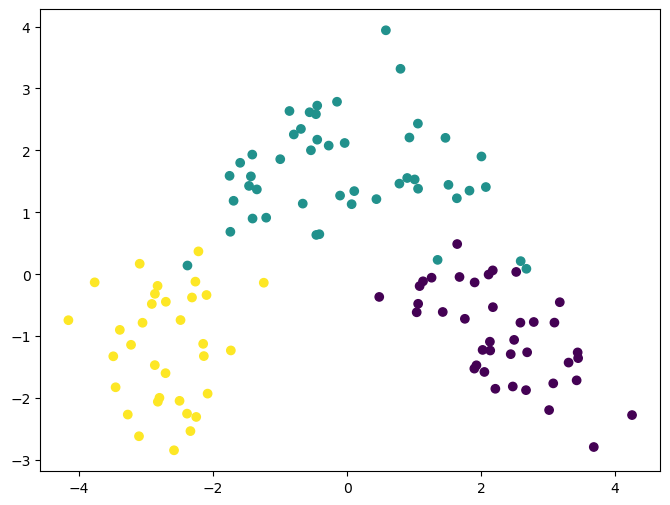

In [55]:
import matplotlib.pyplot as plt
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
plot = plt.scatter(xt[:,0], xt[:,1], c=y_train)
plt.show()

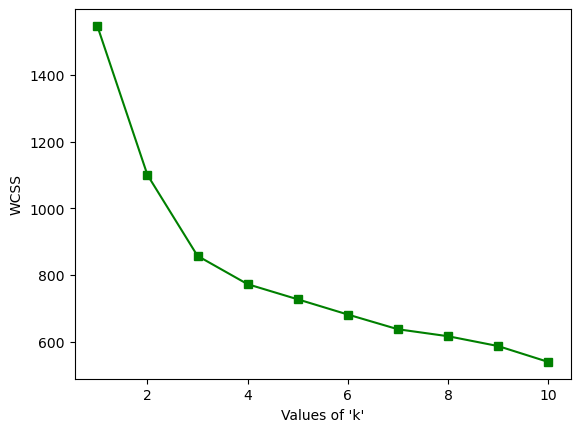

In [58]:
import warnings
warnings.filterwarnings("ignore") 
from sklearn.cluster import KMeans
wcss = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(xt)
    wcss[i] = kmeans.inertia_
     
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()